In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**First Experiment**

In [23]:
input_size = 28*28
hidden_size1 = 512
hidden_size2 = 256
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001
dropout_rate = 0.5

In [31]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

100.0%
100.0%
100.0%
100.0%


In [33]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [63]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
class FashionMNISTNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(FashionMNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [26]:
model = FashionMNISTNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
def train_model():
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(train):
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        accuracy = 100 * correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train):.4f}, Accuracy: {accuracy:.2f}%')

def test_model():
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        total_loss = 0
        for images, labels in test:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            total_loss += loss.item()
        
        accuracy = 100 * correct / total
        avg_loss = total_loss / len(test)
        print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%')
        return accuracy

In [41]:
def show_classification_results(num_samples=5):
    model.eval()
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    test_images, test_labels = next(iter(test))
    indices = random.sample(range(len(test_images)), num_samples)
    
    with torch.no_grad():
        images = test_images[indices].to(device)
        labels = test_labels[indices].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        plt.figure(figsize=(20, 10))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(images[i].cpu().squeeze(), cmap='gray')
            plt.title(f'Pred: {class_names[predicted[i]]}\nTrue: {class_names[labels[i]]}')
            plt.axis('off')
        plt.show()

In [32]:
print("Training started...")
train_model()
print("\nTesting model...")
test_accuracy = test_model()

Training started...
Epoch [1/20], Loss: 0.8229, Accuracy: 70.55%
Epoch [2/20], Loss: 0.5611, Accuracy: 78.65%
Epoch [3/20], Loss: 0.5112, Accuracy: 80.77%
Epoch [4/20], Loss: 0.4730, Accuracy: 82.07%
Epoch [5/20], Loss: 0.4535, Accuracy: 83.07%
Epoch [6/20], Loss: 0.4415, Accuracy: 83.34%
Epoch [7/20], Loss: 0.4256, Accuracy: 84.07%
Epoch [8/20], Loss: 0.4118, Accuracy: 84.70%
Epoch [9/20], Loss: 0.4032, Accuracy: 84.92%
Epoch [10/20], Loss: 0.3968, Accuracy: 85.31%
Epoch [11/20], Loss: 0.3899, Accuracy: 85.34%
Epoch [12/20], Loss: 0.3804, Accuracy: 85.77%
Epoch [13/20], Loss: 0.3788, Accuracy: 85.83%
Epoch [14/20], Loss: 0.3689, Accuracy: 86.23%
Epoch [15/20], Loss: 0.3628, Accuracy: 86.31%
Epoch [16/20], Loss: 0.3602, Accuracy: 86.72%
Epoch [17/20], Loss: 0.3568, Accuracy: 86.73%
Epoch [18/20], Loss: 0.3545, Accuracy: 86.83%
Epoch [19/20], Loss: 0.3486, Accuracy: 87.00%
Epoch [20/20], Loss: 0.3463, Accuracy: 87.11%

Testing model...
Test Loss: 0.3544, Test Accuracy: 87.77%


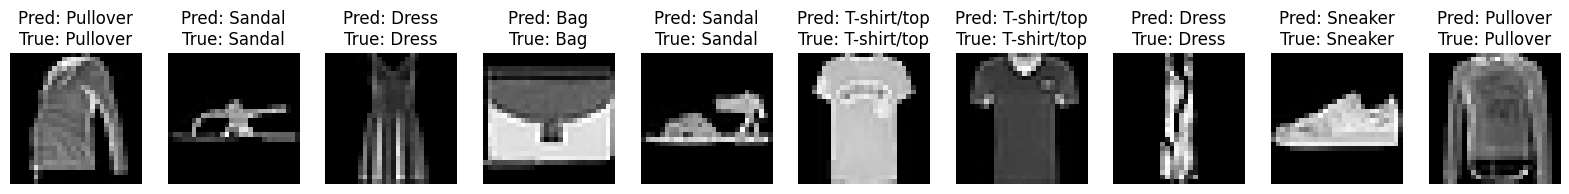

In [44]:
show_classification_results(10)

**Second Experiment**

In [48]:
input_size = 28*28
hidden_size1 = 512
hidden_size2 = 256
hidden_size3 = 128
num_classes = 10
num_epochs = 30
batch_size = 256
learning_rate = .001
dropout_rate = .25

In [52]:
class FashionMNISTNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super(FashionMNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_size3, num_classes)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

In [53]:
model = FashionMNISTNet(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [54]:
print("Training started...")
train_model()
print("\nTesting model...")
test_accuracy = test_model()

Training started...
Epoch [1/30], Loss: 0.6059, Accuracy: 77.88%
Epoch [2/30], Loss: 0.4151, Accuracy: 84.98%
Epoch [3/30], Loss: 0.3804, Accuracy: 86.19%
Epoch [4/30], Loss: 0.3542, Accuracy: 87.09%
Epoch [5/30], Loss: 0.3354, Accuracy: 87.86%
Epoch [6/30], Loss: 0.3255, Accuracy: 88.09%
Epoch [7/30], Loss: 0.3132, Accuracy: 88.50%
Epoch [8/30], Loss: 0.3044, Accuracy: 88.76%
Epoch [9/30], Loss: 0.2948, Accuracy: 89.08%
Epoch [10/30], Loss: 0.2885, Accuracy: 89.40%
Epoch [11/30], Loss: 0.2799, Accuracy: 89.59%
Epoch [12/30], Loss: 0.2759, Accuracy: 89.96%
Epoch [13/30], Loss: 0.2702, Accuracy: 89.99%
Epoch [14/30], Loss: 0.2612, Accuracy: 90.12%
Epoch [15/30], Loss: 0.2563, Accuracy: 90.31%
Epoch [16/30], Loss: 0.2533, Accuracy: 90.58%
Epoch [17/30], Loss: 0.2503, Accuracy: 90.64%
Epoch [18/30], Loss: 0.2480, Accuracy: 90.81%
Epoch [19/30], Loss: 0.2422, Accuracy: 90.85%
Epoch [20/30], Loss: 0.2397, Accuracy: 90.94%
Epoch [21/30], Loss: 0.2357, Accuracy: 91.15%
Epoch [22/30], Loss: 0.

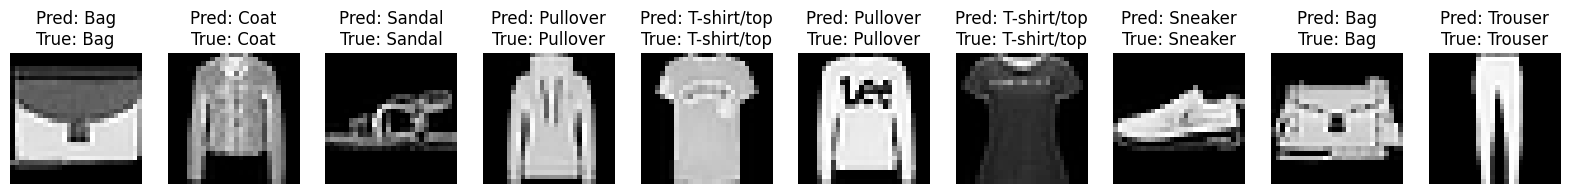

In [58]:
show_classification_results(10)